In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
file_path = "spam.csv"  # Ensure you upload this file before running
data = pd.read_csv(file_path, encoding='latin-1')

In [6]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [8]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    return text

data["clean_message"] = data["message"].apply(clean_text)

In [12]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data["clean_message"])
y = data["label"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9677

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



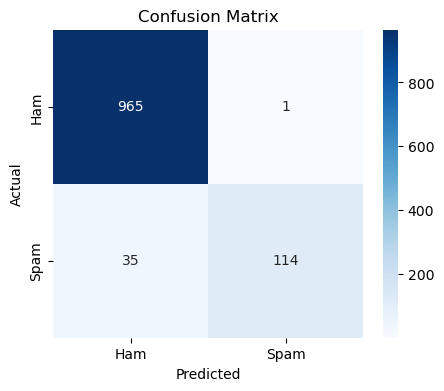

In [ ]:
#plotting the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def predict_message():
    user_input = input("Enter a message to check if it's spam or not: ")
    text_cleaned = clean_text(user_input)  # Apply the same preprocessing
    text_vectorized = vectorizer.transform([text_cleaned])  # Convert to TF-IDF features
    prediction = model.predict(text_vectorized)[0]  # Predict spam or ham
    print("\nPrediction:", "📩 Spam" if prediction == 1 else "✅ Not Spam")

# Run the prediction loop
while True:
    predict_message()
    choice = input("\nDo you want to check another message? (yes/no): ").strip().lower()
    if choice != 'yes':
        print("Exiting the Spam Detector. Have a great day! 😊")
        break

Enter a message to check if it's spam or not:  Congratulations! You won a free iPhone! Claim now.



Prediction: 📩 Spam



Do you want to check another message? (yes/no):  yes
Enter a message to check if it's spam or not:  Hey, let's catch up for lunch tomorrow.



Prediction: ✅ Not Spam



Do you want to check another message? (yes/no):  yes
Enter a message to check if it's spam or not:  "Hey, are we meeting at 5 PM?"



Prediction: ✅ Not Spam



Do you want to check another message? (yes/no):  yes
Enter a message to check if it's spam or not:  ou have won $1000! Click the link to claim!



Prediction: 📩 Spam
